<a href="https://colab.research.google.com/github/DeniseGoulart/CienciaDeDados/blob/main/Analise_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
#Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("fivethirtyeight")

In [12]:
#Criando o Data Frame - este arquivo é um controle de notas dos alunos em um ano letivo. O Upload foi feito pelo menu do colab
df = pd.read_excel("ControleAlunos.xlsx")

In [13]:
#Visualizando as 5 primeiras linhas
df.head()

,Codigo Aluno,Nome,Data de Nascimento,Ano Escolar,Total Etapa 1,Total Etapa 2,Total Etapa 3
0,1,Alisson,2010-03-05,8,4.0,25.7,24.1
1,2,Ana Carolina,2009-08-12,8,17.8,29.6,25.9
2,3,Bruno,2009-12-24,8,1.6,10.6,17.3
3,4,Daniel,2010-01-07,8,13.8,13.9,5.3
4,5,G.Mamede,2008-05-02,8,29.5,27.0,31.9


In [14]:
#Verificando a quantidade de linhas e colunas
df.shape

(63, 7)

In [15]:
#Verificando os tipos de dados em cada coluna
df.dtypes

Codigo Aluno                   int64
Nome                          object
Data de Nascimento    datetime64[ns]
Ano Escolar                    int64
Total Etapa 1                float64
Total Etapa 2                float64
Total Etapa 3                float64
dtype: object

In [16]:
#Qual a nota total de cada aluno no ano letivo proposto?
df["Nota Total"] = df["Total Etapa 1"] + df["Total Etapa 2"] + df["Total Etapa 3"]

In [17]:
#Lendo a primeira linha para conferir a nova aluna Nota Total
df.head(1)

,Codigo Aluno,Nome,Data de Nascimento,Ano Escolar,Total Etapa 1,Total Etapa 2,Total Etapa 3,Nota Total
0,1,Alisson,2010-03-05,8,4.0,25.7,24.1,53.8


In [18]:
#Criando nova coluna com o status do aluno: aprovado (se ficou com mais do que 60) ou reprovado (se ficou com menos de 60)
df["Status do Aluno"] = np.where(df["Nota Total"]<60, "Reprovado", "Aprovado")

In [19]:
#Conferindo a criação da coluna Status do Aluno nas 5 primeiras linhas
df.head()

,Codigo Aluno,Nome,Data de Nascimento,Ano Escolar,Total Etapa 1,Total Etapa 2,Total Etapa 3,Nota Total,Status do Aluno
0,1,Alisson,2010-03-05,8,4.0,25.7,24.1,53.8,Reprovado
1,2,Ana Carolina,2009-08-12,8,17.8,29.6,25.9,73.3,Aprovado
2,3,Bruno,2009-12-24,8,1.6,10.6,17.3,29.5,Reprovado
3,4,Daniel,2010-01-07,8,13.8,13.9,5.3,33.0,Reprovado
4,5,G.Mamede,2008-05-02,8,29.5,27.0,31.9,88.4,Aprovado


In [23]:
#Calculando a média de notas de todos os alunos
round(df["Nota Total"].mean(), 2)

48.7

In [41]:
#Mostrando a quantidade de alunos aprovados e reprovados por ano
df.groupby("Ano Escolar")["Status do Aluno"].value_counts()

Ano Escolar  Status do Aluno
6            Reprovado          14
             Aprovado            5
7            Reprovado          13
             Aprovado            5
8            Reprovado           9
             Aprovado            7
9            Reprovado           9
             Aprovado            1
Name: Status do Aluno, dtype: int64

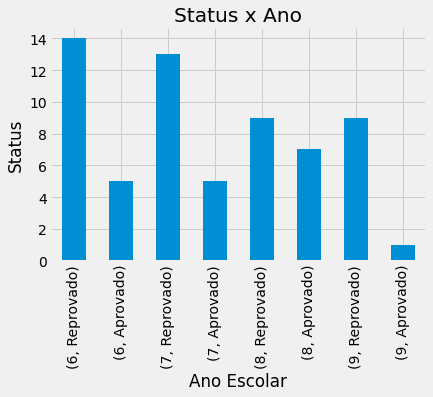

In [45]:
#Gráfico que mostra Status X Ano
df.groupby("Ano Escolar")["Status do Aluno"].value_counts().plot.bar(title = "Status x Ano")
plt.xlabel("Ano Escolar")
plt.ylabel("Status");

In [47]:
#Análises estatísticas das notas finais dos alunos
df["Nota Total"].describe()

count    63.000000
mean     48.704762
std      18.673273
min       7.700000
25%      34.100000
50%      50.800000
75%      62.250000
max      91.500000
Name: Nota Total, dtype: float64

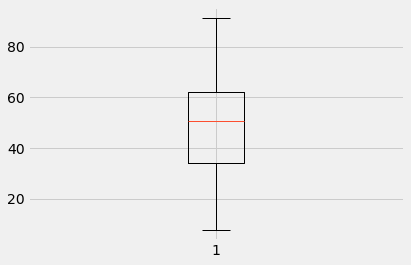

In [49]:
#Plotando esses dados acima em um BoxPlot
plt.boxplot(df["Nota Total"]);

In [50]:
#Agrupando, por ano de nascimento, os aprovados e reprovados
df.groupby(df["Data de Nascimento"].dt.year)["Status do Aluno"].value_counts()

Data de Nascimento  Status do Aluno
2007                Reprovado           2
2008                Reprovado           6
                    Aprovado            1
2009                Reprovado           9
                    Aprovado            8
2010                Reprovado          11
                    Aprovado            3
2011                Reprovado          12
                    Aprovado            5
2012                Reprovado           5
                    Aprovado            1
Name: Status do Aluno, dtype: int64

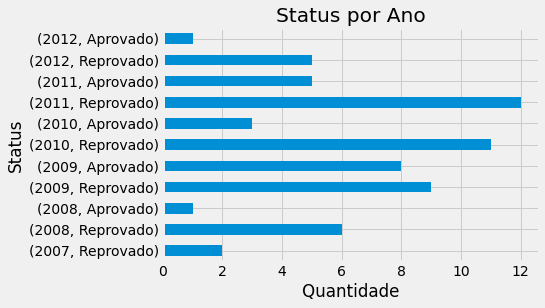

In [58]:
#Gráfico de barras horizontai
df.groupby(df["Data de Nascimento"].dt.year)["Status do Aluno"].value_counts().plot.barh(title = "Status por Ano")
plt.xlabel("Quantidade")
plt.ylabel("Status");

In [60]:
#Transformando a base de dados trabalhada em um novo arquivo csv
df.to_csv("df_controle_alunos_novo.csv", index=False)